In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import cv2
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
%matplotlib inline

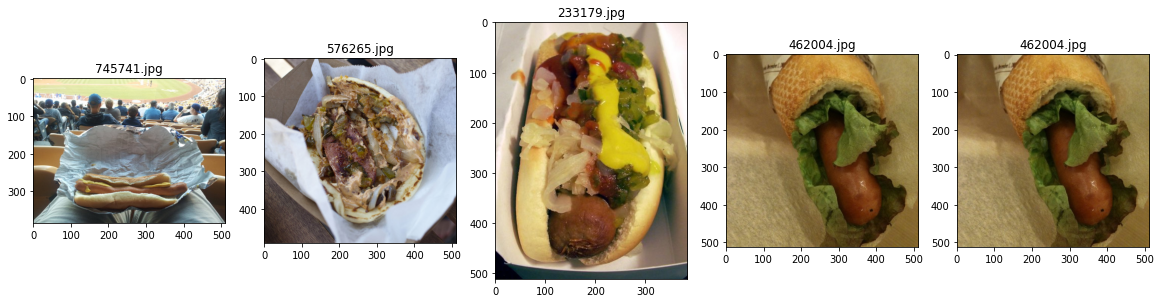

In [2]:
import random
plt.figure(figsize=(20,20))

test_folder = r'./test/hot_dog'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path = os.path.join(test_folder, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [3]:
IMG_HEIGHT = 200
IMG_WIDTH = 200

# Helper method to create the data sets
# In this method, we will take an image and create an array of integers
# that represent the image (stored in img_data_array), and the label array (stored as class_name)
def create_dataset(img_folder):
    
    img_data_array=[]
    class_name=[]

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            img = Image.open(image_path)
            image = np.asarray(img)
            image = np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
            image = image.astype('float32')
            image /= 255  
            img_data_array.append(image)
            class_name.append(dir1)

    return img_data_array , class_name

In [4]:
# Create dataset for the image as an array of numbers (normalized) and the labels
hotdog_train, hotdog_label = create_dataset(r'./train')

#Creates a dictionary: {'hotdog': 0, "not hot dog": 1}
target_dict = {k: v for v,k in enumerate(np.unique(hotdog_label))}

#creating an array where target_val[i] will be the target value for hotdot_train[i],
# target_val[i] will be either 0 or 1
target_val =  [target_dict[hotdog_label[i]] for i in range(len(hotdog_label))]

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size = 3, strides=(2,2), activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(x=np.array(hotdog_train, np.float32), y=np.array(target_val, np.float32), epochs=15)
print(np.array(hotdog_train).shape)
print(np.array(target_val).shape)

Epoch 1/15
16/16 [==============================] - 6s 303ms/step - loss: 1.0146 - accuracy: 0.5211
Epoch 2/15
16/16 [==============================] - 5s 293ms/step - loss: 0.6949 - accuracy: 0.5755
Epoch 3/15
16/16 [==============================] - 5s 301ms/step - loss: 0.6323 - accuracy: 0.6640
Epoch 4/15
16/16 [==============================] - 5s 283ms/step - loss: 0.6068 - accuracy: 0.6801
Epoch 5/15
16/16 [==============================] - 5s 291ms/step - loss: 0.5461 - accuracy: 0.7505
Epoch 6/15
16/16 [==============================] - 5s 292ms/step - loss: 0.5123 - accuracy: 0.7525
Epoch 7/15
16/16 [==============================] - 5s 319ms/step - loss: 0.4577 - accuracy: 0.7827
Epoch 8/15
16/16 [==============================] - 6s 378ms/step - loss: 0.3972 - accuracy: 0.8410
Epoch 9/15
16/16 [==============================] - 7s 440ms/step - loss: 0.3611 - accuracy: 0.8592
Epoch 10/15
16/16 [==============================] - 7s 411ms/step - loss: 0.3161 - accuracy: 0.8873

In [13]:
image_test = r'./test/hot_dog/550512.jpg'
i = Image.open(image_test)
image = np.asarray(i)
image = np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
image = image.astype('float32')
image /= 255

img_data = image
img_data = img_data.reshape(1,200,200,3)

res = model.predict(img_data)

if (res[0] < 0.5):
    print("hotdog")
else:
    print("not hotdog")

hotdog


In [8]:
#0 for hotdog, 1 for not hot dog
test_hotdog, test_label = create_dataset(r'./test')
target_dict = {k: v for v,k in enumerate(np.unique(test_label))}
target_val =  [target_dict[test_label[i]] for i in range(len(test_label))]

In [9]:
test_loss, test_acc = model.evaluate(np.array(test_hotdog, np.float32), np.array(target_val, np.float32))

16/16 [==============================] - 2s 88ms/step - loss: 1.3216 - accuracy: 0.5361


In [16]:
### TEST ACCURACY SCORE:
print("Test Accuracy: ", test_acc)

Test Accuracy:  0.5360824465751648
